%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>

## import 

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from lib.noglobal import noglobal
import matplotlib.pyplot as plt

In [34]:
@noglobal()
def count_signals_per_satelite(df):
    hash_map = {}

    for i in range(1,38):
        hash_map[str(i)] = [];


    for key,df_per_time in tqdm(df.groupby("millisSinceGpsEpoch")):

        sr = df_per_time.groupby("svid")["phoneName"].count()
        for sate_id,val in zip(sr.index,sr):
            hash_map[str(sate_id)].append(val)

    for key in hash_map.keys():
        if (len(hash_map[key]) != 0):
            print(key,sum(hash_map[key])/len(hash_map[key]))
        else:
            print(key,0)

            
            
@noglobal()
def count_signals(df):
        
    #fig,axis = plt.subplots(10,4,figsize=(32,80))
    
    count = 0;
    
    s = pd.DataFrame();
    
    after_second_flag = False
    
    for key,df_per_svid in tqdm(df.groupby("svid")):
        
        if (not after_second_flag):
            s = df_per_svid.groupby("millisSinceGpsEpoch")["phoneName"].count()
            after_second_flag = True
        else:
            s = pd.merge(s, df_per_svid.groupby("millisSinceGpsEpoch")["phoneName"].count(), how='outer', left_index=True, right_index=True,suffixes= ("","_"+str(key)))
            
            
            
    return s.fillna(0)



## 精度悪い場合

In [39]:
path = "/work/data/input/google-smartphone-decimeter-challenge/train/2020-09-04-US-SF-1/Pixel4/Pixel4_derived.csv"
df = pd.read_csv(path)
#count_signals_per_satelite(df)

s = count_signals(df).mean()
s.sum(axis=1)

  0%|          | 0/26 [00:00<?, ?it/s]

ValueError: No axis named 1 for object type Series

## 精度ましなパス

  0%|          | 0/22 [00:00<?, ?it/s]

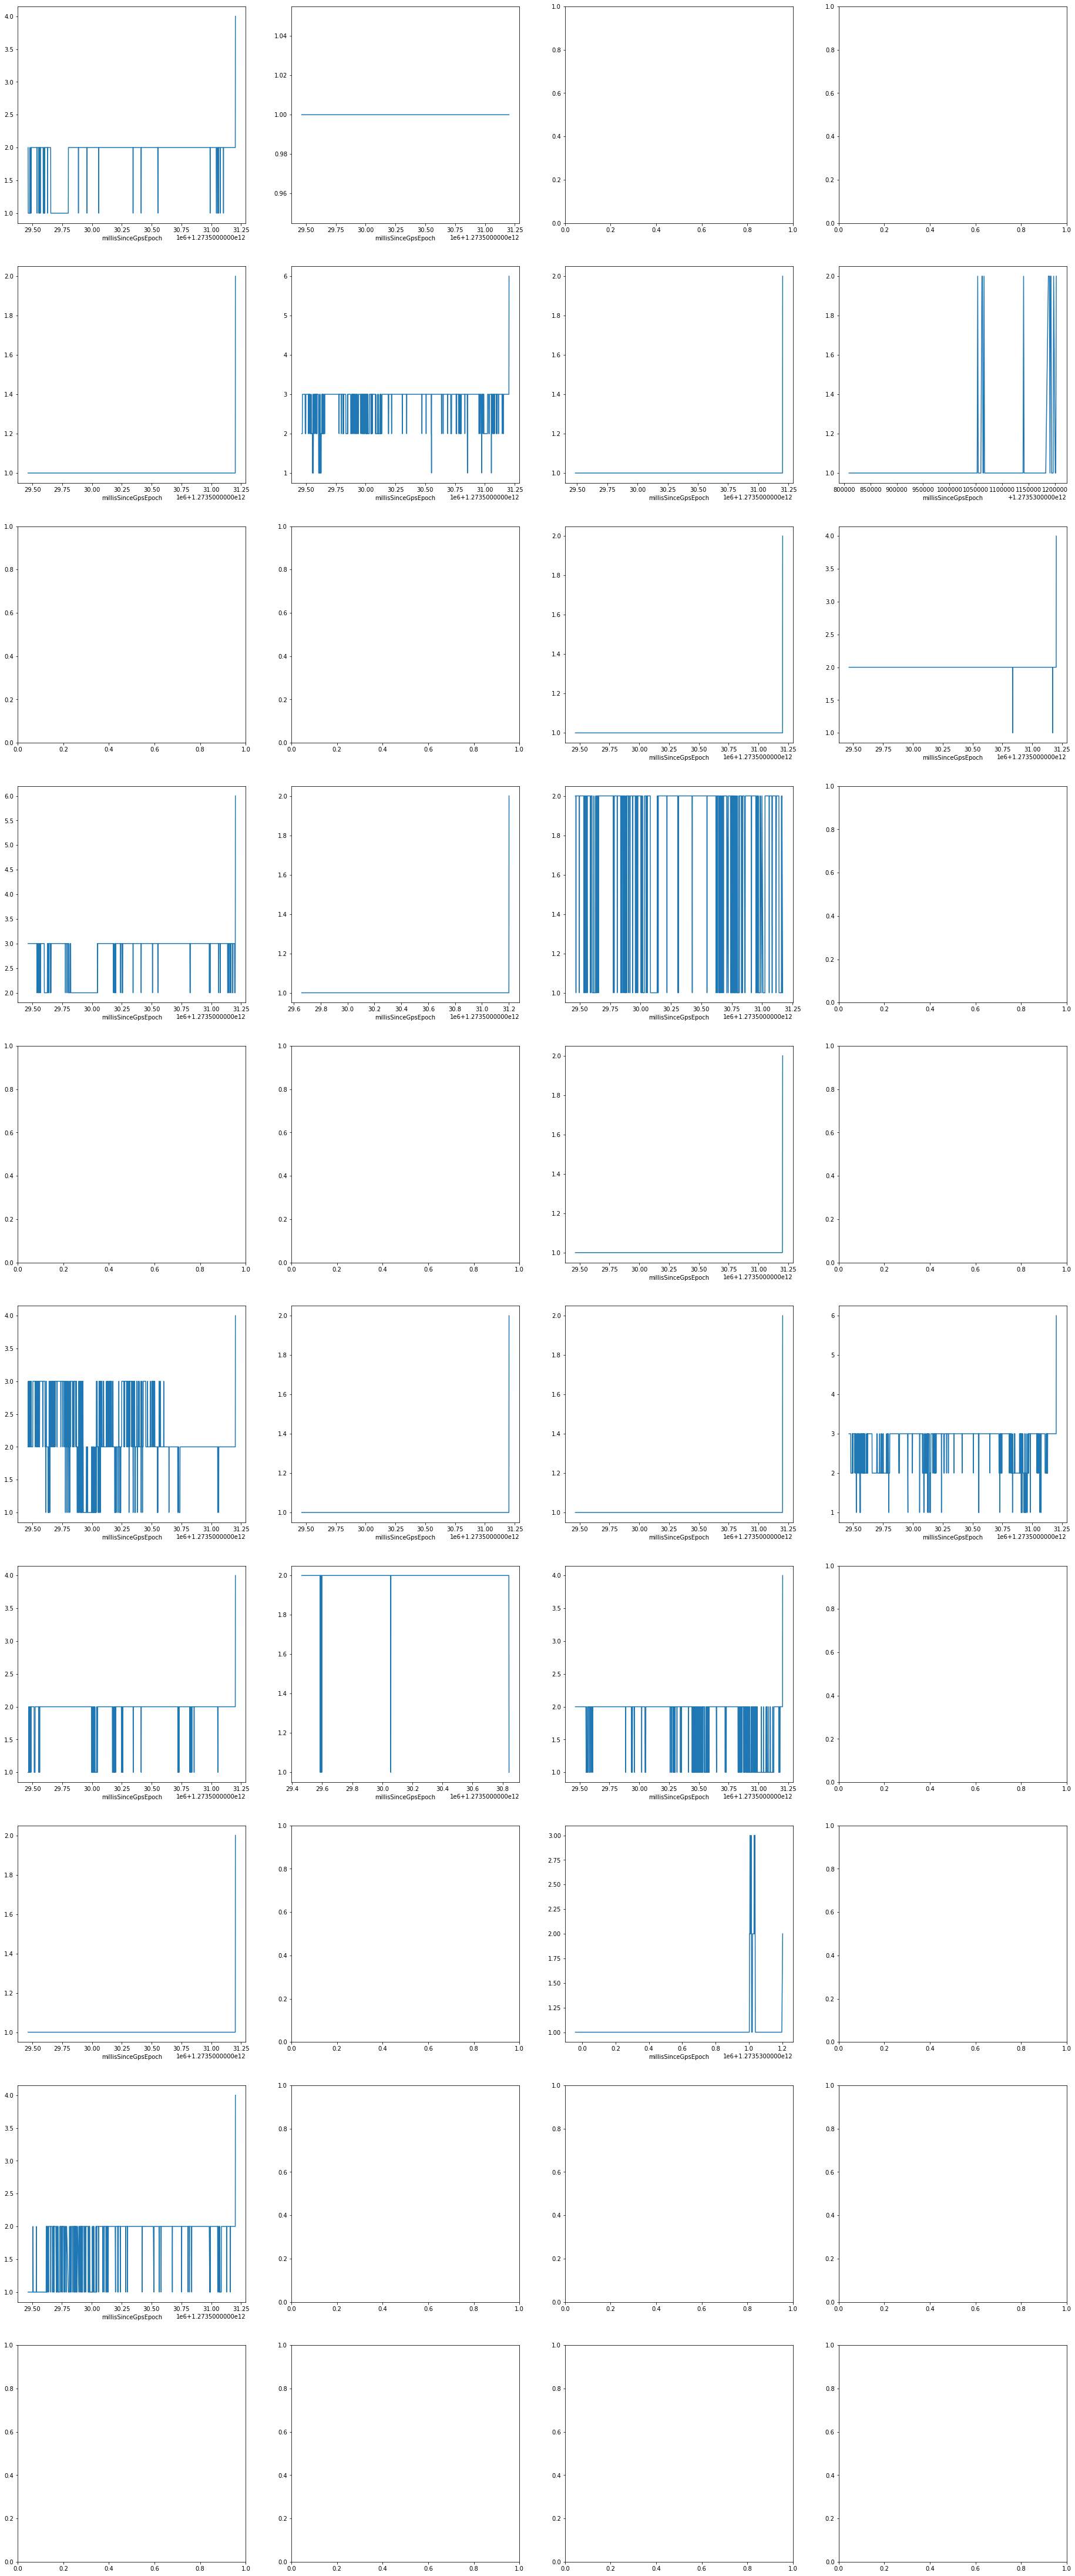

In [4]:
path = "/work/data/input/google-smartphone-decimeter-challenge/train/2020-05-14-US-MTV-1/Pixel4/Pixel4_derived.csv"

df = pd.read_csv(path)
#count_signals_per_satelite(df)
count_signals_per_satelite(df)